# Plot the pooled results of multilayer perceptron model

In [5]:
import pandas as pd
import numpy as np
import pickle

import sys
#path to the functions folder
sys.path.append('../onc_functions')
#import custom plotting functions
from plot_functions import onc_calc_cm, onc_plot_roc, onc_plot_roc_no_threshold

In [2]:
#import the pooled results from the MLP model
with open('./results/2021_final_MLP_model_test_pred_proba_pooled.pickle', 'rb') as f:
        results = pickle.load(f)

#keep the columns we need for calibration
results = results.loc[:,['score','died_in_90','subset','usrds_id']]
results = results.rename(columns={'died_in_90':'y'})
results.head()

,score,y,subset,usrds_id
0,0.693623,1.0,9,31089.0
1,0.658592,0.0,8,34521.0
2,0.477407,0.0,8,46751.0
3,0.560426,0.0,9,50506.0
4,0.216050,0.0,8,54985.0


# Plot the ROC AUC with points at 20% and 50% thresholds

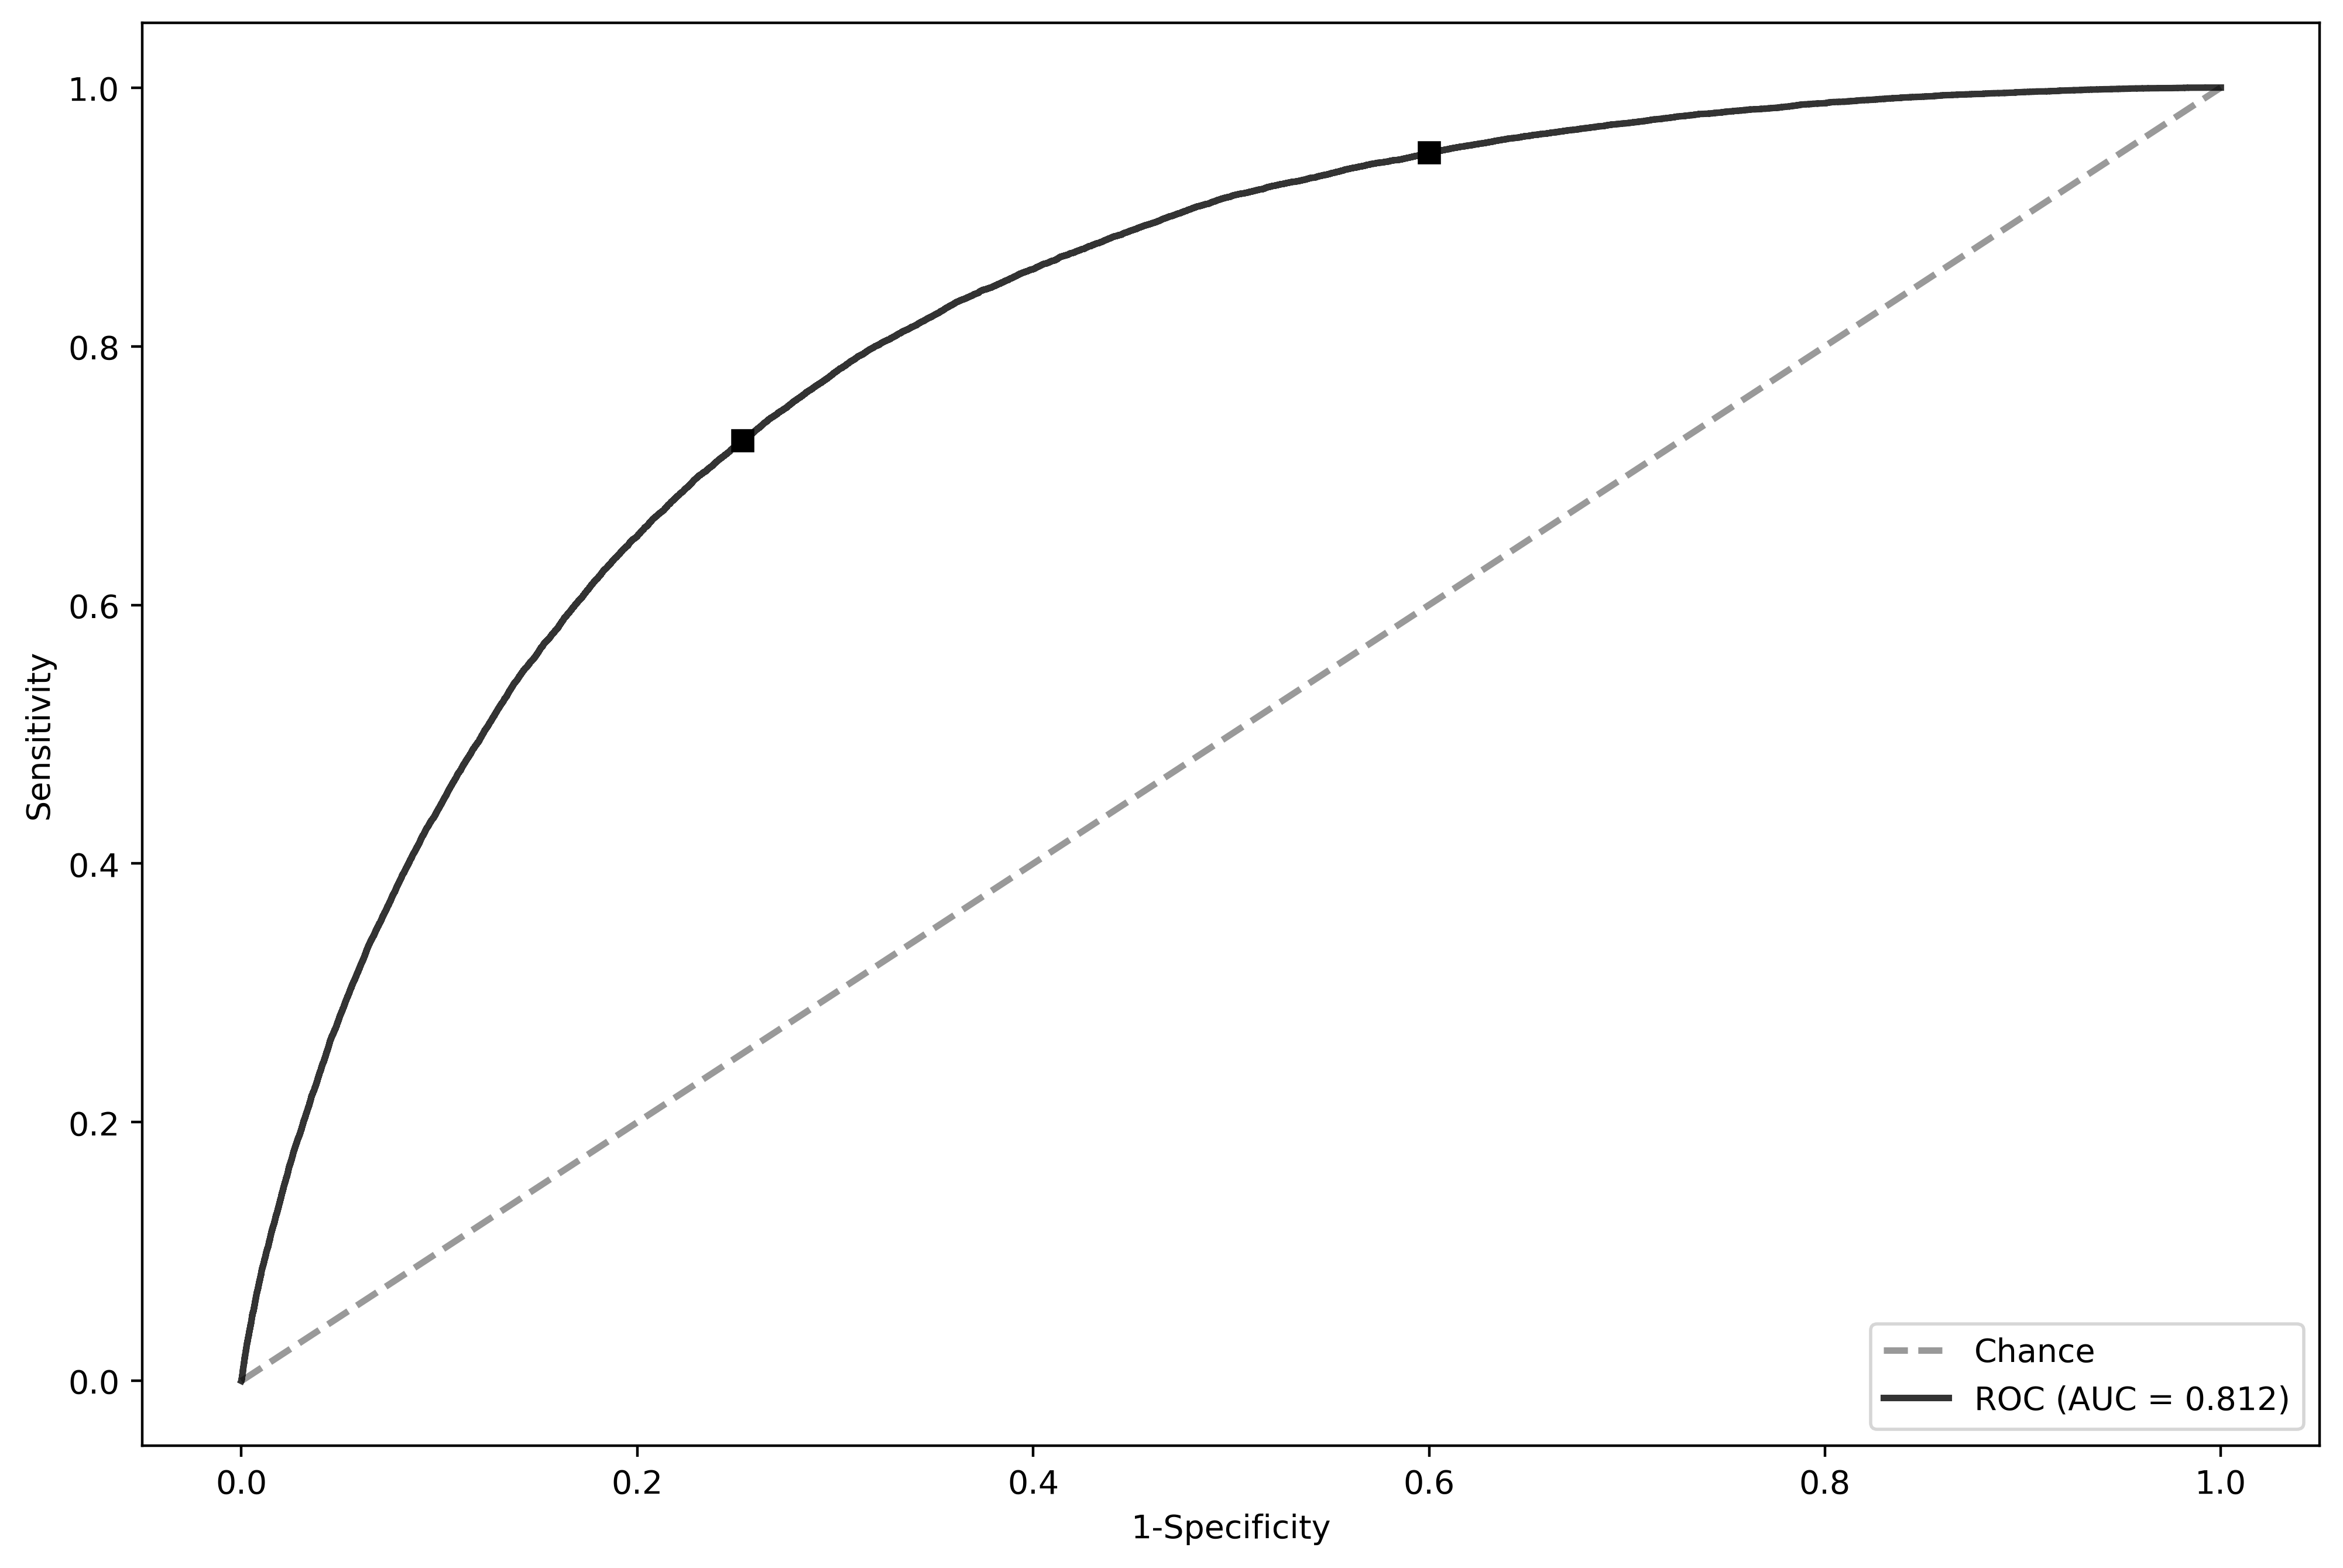

In [3]:
onc_plot_roc(
            y_true=results.y, 
            y_pred=results.score, 
            model_name='mlp');

## Print the confusion matrix and performance metrics for multiple thresholds

In [4]:
cm = onc_calc_cm(
    results.y, 
    results.score, 
    range_probas=[.10,.20, .30, .40, .50])
cm.to_csv('./results/2021_mlp_confusion_matrix.csv')
cm

,threshold,sensitivity,specificity,likelihood_ratio_neg,likelihood_ratio_pos,tp,fp,tn,fn,total_survived,total_deceased
0.1,0.1,0.987839,0.201204,0.0604413,1.23666,25425,255269,64298,313,319567,25738
0.2,0.2,0.949763,0.399753,0.12567,1.58229,24445,191819,127748,1293,319567,25738
0.3,0.3,0.894631,0.540735,0.194864,1.94796,23026,146766,172801,2712,319567,25738
0.4,0.4,0.822985,0.651134,0.271856,2.35903,21182,111486,208081,4556,319567,25738
0.5,0.5,0.726824,0.746807,0.365792,2.87064,18707,80912,238655,7031,319567,25738
